In [82]:
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import seaborn as sns
sns.set()
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import datetime 

__IMPORT I BADANIE DANYCH__

In [2]:
df = pd.read_csv('AmesHousing.csv')

In [3]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [12]:
df = df.set_index("Order")

In [4]:
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 85)
pd.options.display.float_format = '{:20.2f}'.format
df.head(n=5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.00,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.00,Unf,0.00,441.00,1080.00,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.00,0.00,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.00,Fin,2.00,528.00,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.00,Gd,TA,CBlock,TA,TA,No,ALQ,1065.00,Unf,0.00,1045.00,2110.00,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.00,0.00,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.00,Fin,2.00,522.00,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
print("Shape of df: ", df.shape)

Shape of df:  (2930, 82)


In [6]:
ProfileReport(df, title='Opis danych', minimal=True)
#profile.to_file(output_file="raport_min.html") #możliwość wyrzucenia raportu do pliku HTML

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
df.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

,mean,std,min,50%,max
Order,1465.50,845.96,1.00,1465.50,2930.00
PID,714464496.99,188730844.65,526301100.00,535453620.00,1007100110.00
MS SubClass,57.39,42.64,20.00,50.00,190.00
Lot Frontage,69.22,23.37,21.00,68.00,313.00
Lot Area,10147.92,7880.02,1300.00,9436.50,215245.00
Overall Qual,6.09,1.41,1.00,6.00,10.00
Overall Cond,5.56,1.11,1.00,5.00,9.00
Year Built,1971.36,30.25,1872.00,1973.00,2010.00
Year Remod/Add,1984.27,20.86,1950.00,1993.00,2010.00
Mas Vnr Area,101.90,179.11,0.00,0.00,1600.00


In [9]:
f = open("data_description.txt", "r")
print(f.read())

FileNotFoundError: [Errno 2] No such file or directory: 'data_description.txt'

In [10]:
obj = list(df.loc[:,df.dtypes == 'object'].columns.values)
obj

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [9]:
df.describe(include=[np.object]).transpose() \
    .drop("count", axis=1)

,unique,top,freq
MS Zoning,7,RL,2273
Street,2,Pave,2918
Alley,2,Grvl,120
Lot Shape,4,Reg,1859
Land Contour,4,Lvl,2633
Utilities,3,AllPub,2927
Lot Config,5,Inside,2140
Land Slope,3,Gtl,2789
Neighborhood,28,NAmes,443
Condition 1,9,Norm,2522


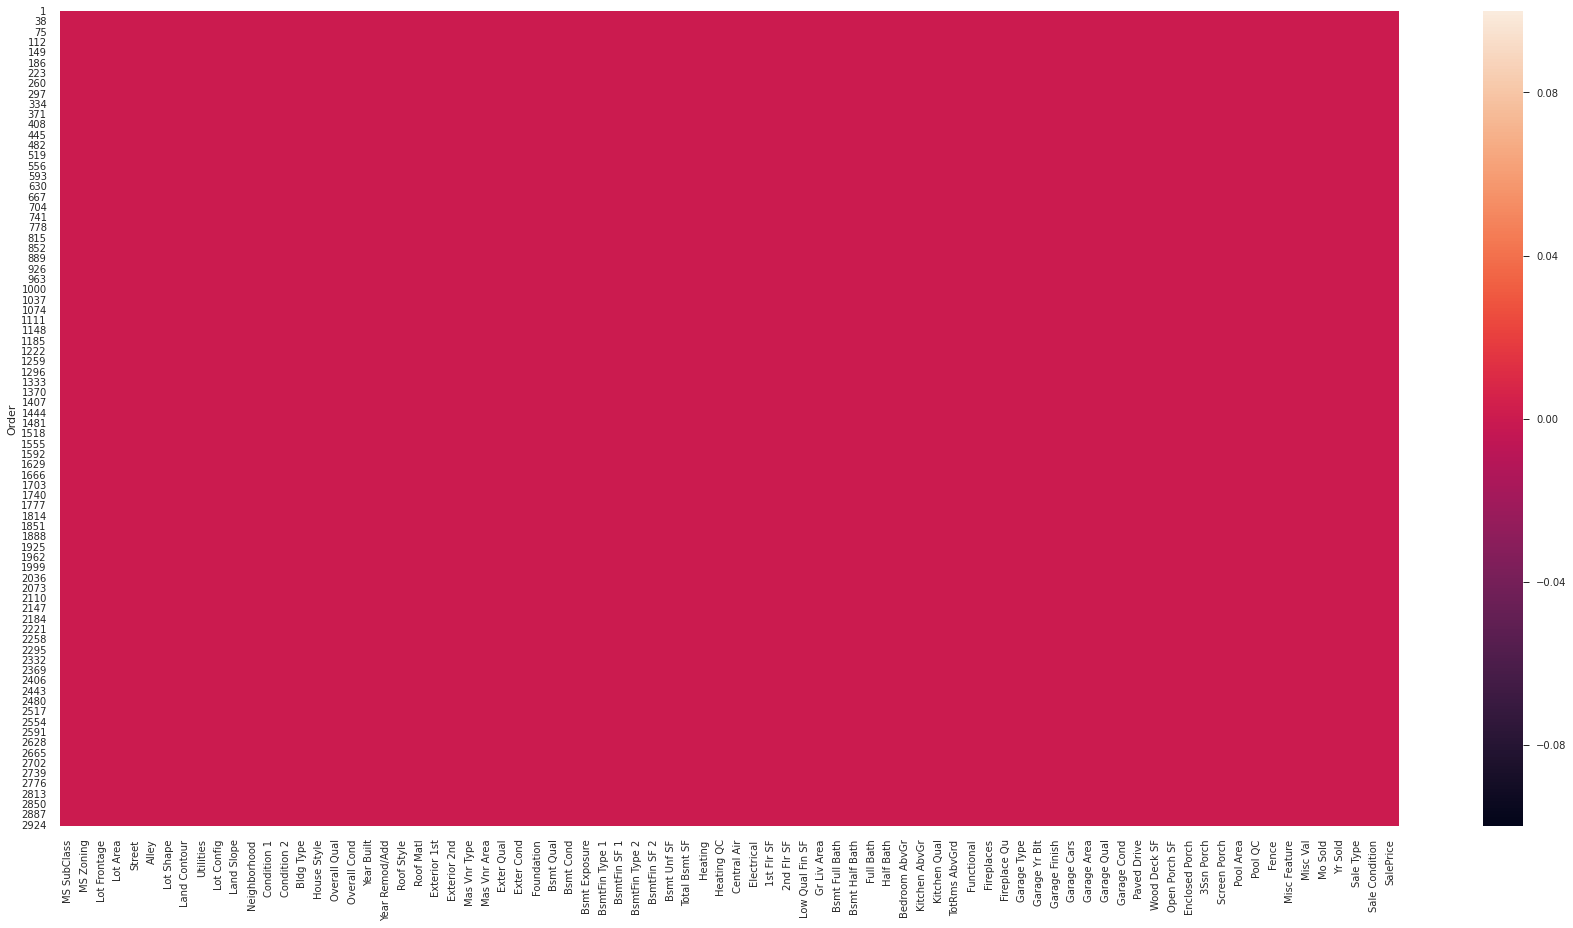

In [54]:
plt.figure(figsize=(30,15))
sns.heatmap(df.isnull())

In [11]:
df['SalePrice'].describe()

count                2930.00
mean               180796.06
std                 79886.69
min                 12789.00
25%                129500.00
50%                160000.00
75%                213500.00
max                755000.00
Name: SalePrice, dtype: float64

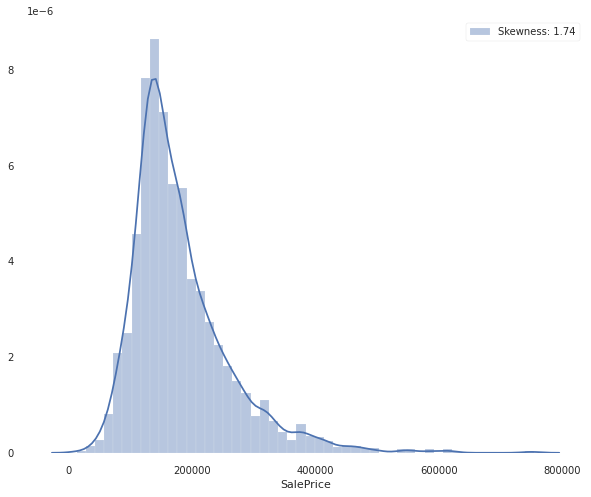

In [12]:
plt.figure(figsize=(10,8))
bar = sns.distplot(df['SalePrice'])
bar.legend(["Skewness: {:.2f}".format(df['SalePrice'].skew())]);

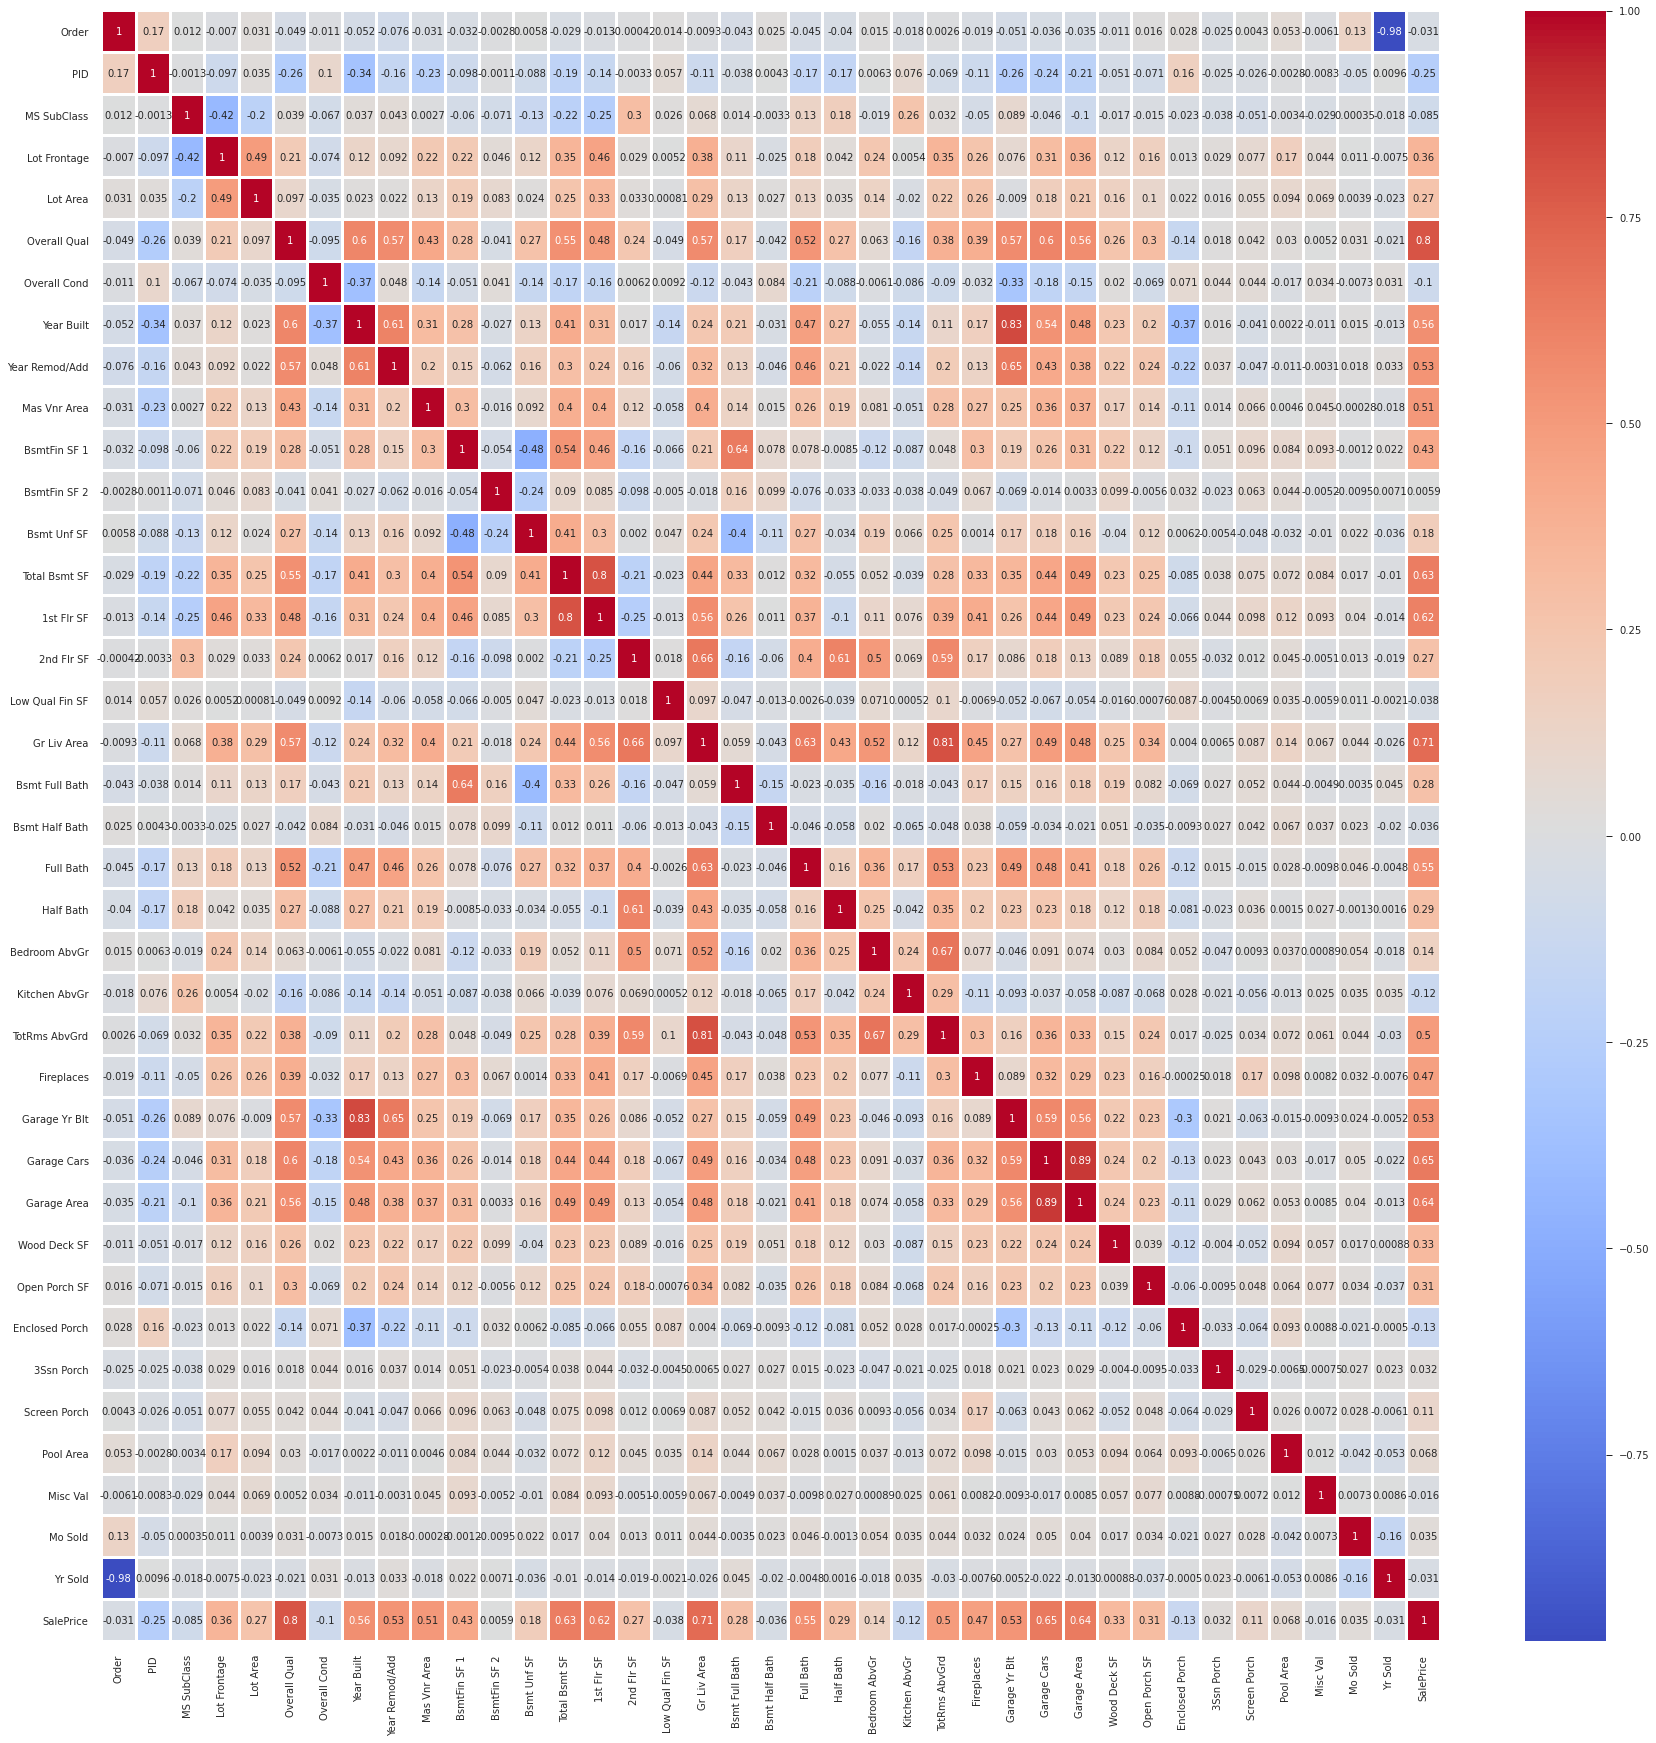

In [13]:
plt.figure(figsize=(30,30))
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, linewidth=2)


In [14]:
high_corr = df.corr()
high_corr_features = high_corr.index[abs(high_corr["SalePrice"]) >= 0.5]
high_corr_features

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice'],
      dtype='object')

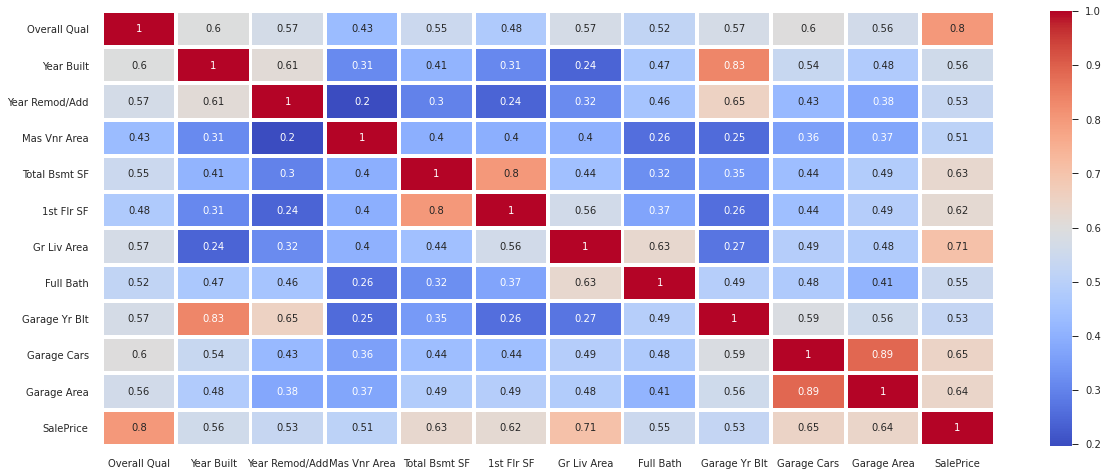

In [15]:
plt.figure(figsize=(20,8))
ax = sns.heatmap(df[high_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)

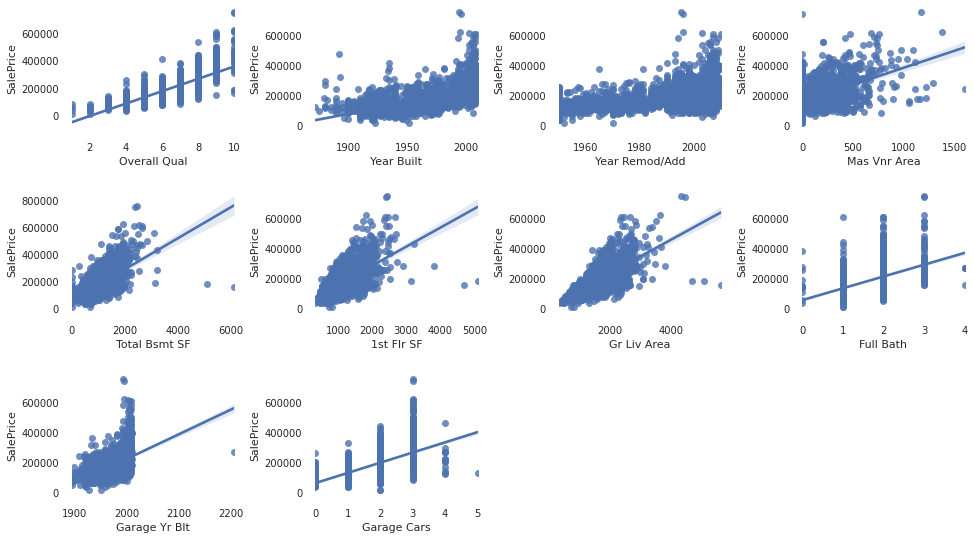

In [16]:
plt.figure(figsize=(16,9))
for i in range(len(high_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
        sns.regplot(data=df, x = high_corr_features[i], y = 'SalePrice')

__BRAKI W DANYCH - UZUPŁNIENIE DANYCH__

In [17]:
num_missing = df.isna().sum()
num_missing = num_missing[num_missing > 0]
percent_missing = num_missing * 100 / df.shape[0]
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Qual,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43


In [42]:
missing_col = df.columns[df.isnull().any()]
missing_col

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [18]:
df["Pool QC"].fillna("No Pool", inplace=True)
df['Misc Feature'].fillna('No feature', inplace=True)
df['Alley'].fillna('No Alley', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)
df['Fireplace Qu'].fillna('No Fireplace', inplace=True)
df['Lot Frontage'].fillna(0, inplace=True)
df['Mas Vnr Area'].fillna(0, inplace=True)
df['Mas Vnr Type'].fillna("None", inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [19]:
garage_columns = [col for col in df.columns if col.startswith("Garage")]
df[df['Garage Cars'].isna()][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2236,Detchd,nan,NaN,nan,nan,NaN,NaN


In [20]:
df[~pd.isna(df['Garage Type']) & 
        pd.isna(df['Garage Qual'])][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1356,Detchd,nan,NaN,1.00,360.00,NaN,NaN
2236,Detchd,nan,NaN,nan,nan,NaN,NaN


In [21]:
df['Garage Cars'].fillna(0, inplace=True)
df['Garage Area'].fillna(0, inplace=True)

df.loc[~pd.isna(df['Garage Type']) & 
            pd.isna(df['Garage Qual']), "Garage Type"] = "No Garage"

for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    df[col].fillna('No Garage', inplace=True)
    
df['Garage Yr Blt'].fillna(0, inplace=True)

In [22]:
bsmt_columns = [col for col in df.columns if "Bsmt" in col]
df[df['Bsmt Half Bath'].isna()][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan
1497,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,nan,nan


In [23]:
df[~pd.isna(df['Bsmt Cond']) & 
        pd.isna(df['Bsmt Exposure'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
66,Gd,TA,NaN,Unf,0.00,Unf,0.00,1595.00,1595.00,0.00,0.00
1796,Gd,TA,NaN,Unf,0.00,Unf,0.00,725.00,725.00,0.00,0.00
2779,Gd,TA,NaN,Unf,0.00,Unf,0.00,936.00,936.00,0.00,0.00


In [24]:
df[~pd.isna(df['Bsmt Cond']) & 
        pd.isna(df['BsmtFin Type 2'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
444,Gd,TA,No,GLQ,1124.00,NaN,479.00,1603.00,3206.00,1.00,0.00


In [25]:
for col in ["Bsmt Half Bath", "Bsmt Full Bath", "Total Bsmt SF", 
            "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]:
    df[col].fillna(0, inplace=True)

df.loc[~pd.isna(df['Bsmt Cond']) & 
            pd.isna(df['Bsmt Exposure']), "Bsmt Exposure"] = "No"
df.loc[~pd.isna(df['Bsmt Cond']) & 
            pd.isna(df['BsmtFin Type 2']), "BsmtFin Type 2"] = "Unf"

for col in ["Bsmt Exposure", "BsmtFin Type 2", 
            "BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond"]:
    df[col].fillna("No Basement", inplace=True)

In [26]:
df.drop(['PID'], axis=1, inplace=True)

In [27]:
df.isna().values.sum()

0

__Zamiana zmiennych kategorczynych__

In [28]:
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
df['Exter Qual'] = df['Exter Qual'].map(mp)
df['Exter Cond'] = df['Exter Cond'].map(mp)
df['Heating QC'] = df['Heating QC'].map(mp)
df['Kitchen Qual'] = df['Kitchen Qual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
df['Bsmt Qual'] = df['Bsmt Qual'].map(mp)
df['Bsmt Cond'] = df['Bsmt Cond'].map(mp)
df['Bsmt Exposure'] = df['Bsmt Exposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map(mp)
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map(mp)

df['Central Air'] = df['Central Air'].map({'Y':1,'N':0})
df['Functional'] = df['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})
df['Fireplace Qu'] = df['Fireplace Qu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
df['Garage Finish'] = df['Garage Finish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
df['Garage Qual'] = df['Garage Qual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
df['Garage Cond'] = df['Garage Cond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
df['Pool QC'] = df['Pool QC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
df['Land Slope'] = df['Land Slope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
df['Fence'] = df['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

In [29]:
df = pd.get_dummies(df)

__standaryzacja danych__

In [30]:
scaler = StandardScaler()
df.loc[:, df.columns != 'SalePrice'] = scaler.fit_transform(
    df.loc[:, df.columns != 'SalePrice'])

__Podział na x i y i zbiory treningowy i testowy__

In [31]:
y = df['SalePrice']
X = df.drop(['SalePrice'], axis=1)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=3)

Index(['Order', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Land Slope',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area',
       ...
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
       'Sale Condition_Abnorml', 'Sale Condition_AdjLand',
       'Sale Condition_Alloca', 'Sale Condition_Family',
       'Sale Condition_Normal', 'Sale Condition_Partial'],
      dtype='object', length=243)

## Zapisywanie wyników

In [84]:
time_string = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')

In [85]:
def check_dir(name, path):
    try:
        os.mkdir("{0}/{1}".format(path,name))
    except:
        print('dir exists')

'20200625_130717'

In [170]:
def cv_df(grid):
    cv = grid.n_splits_
    results = grid.cv_results_
    #### ------ nazwy parametrow
    names = list(results['params'][0].keys())
    ###----- dataframe z zestawem parametrów
    param_dict = {}
    for n in names:
        par_list = [ results['params'][i][n] for i in range(len(results['params'])) ]
        param_dict[n] = par_list
    param_pd = pd.DataFrame(param_dict)
        
    ##------ dodawanie wyników z każdego folda do wynikowego DF
    results_pd= pd.DataFrame()
    for i in range(cv):
        tmp = param_pd.copy()
        tmp['score'] = results['split{0}_test_score'.format(i)]
        results_pd = results_pd.append(tmp)
        
    time_string = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    
    results_pd.to_csv(f'RFE + {time_string}')
    return results_pd

## RandomForestRegressor

In [169]:
grid.estimator

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [171]:
params = {
     #"min_samples_split": range(2, 21, 2),
      "min_samples_leaf": [25],
      "n_estimators": [50,90, 125],
      "max_depth": [4,7,10,13,15,20],
      "criterion": ['mse']
 }

forest = RandomForestRegressor()
grid= GridSearchCV(forest, params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

KeyboardInterrupt: 

In [172]:

forest = RandomForestRegressor()
params = {
     #"min_samples_split": range(2, 21, 2),
      "min_samples_leaf": [5, 10, 15, 20,25],
      "n_estimators": [5, 25, 75, 150],
      "max_depth": [5,10, 15, 20],
      "criterion": ['mse']}
grid= GridSearchCV(forest, params, cv=5)

#var_num = [5]    
    
#for num in var_num:
 #= #X_train[:, : -num]
grid.fit(X_train, y_train)
cv_df(grid)

,criterion,max_depth,min_samples_leaf,n_estimators,score
0,mse,5,5,5,0.82
1,mse,5,5,25,0.83
2,mse,5,5,75,0.83
3,mse,5,5,150,0.83
4,mse,5,10,5,0.81
...,...,...,...,...,...
75,mse,20,20,150,0.84
76,mse,20,25,5,0.83
77,mse,20,25,25,0.85
78,mse,20,25,75,0.84


## SVR


In [148]:
from sklearn.svm import SVR

In [152]:
linear = SVR(kernel = 'linear')

c = [0.01, 0.1, 1, 10] 

params = {"gamma" : ["scale","auto"],
          "C" : c,
         }

grid = GridSearchCV(linear, params, cv = 5)
grid.fit(X_train, y_train)
cv_df(grid)

,C,gamma,score
0,0.01,scale,-0.06
1,0.01,auto,-0.06
2,0.10,scale,-0.02
3,0.10,auto,-0.02
4,1.00,scale,0.29
5,1.00,auto,0.29
6,10.00,scale,0.77
7,10.00,auto,0.77
0,0.01,scale,-0.09
1,0.01,auto,-0.09


In [160]:
poly = SVR(kernel = 'poly')

c = [0.01, 0.1, 1, 10]
degree = [x for x in range(2,10)]

params = {"gamma" : ["scale","auto"],
          "C" : c,
          "degree" : degree
         }

grid = GridSearchCV(poly, params, cv = 5)
grid.fit(X_train, y_train)
cv_df(grid)

,C,degree,gamma,score
0,0.01,2,scale,-0.07
1,0.01,2,auto,-0.07
2,0.01,3,scale,-0.07
3,0.01,3,auto,-0.07
4,0.01,4,scale,-0.07
...,...,...,...,...
59,10.00,7,auto,-0.06
60,10.00,8,scale,-0.06
61,10.00,8,auto,-0.06
62,10.00,9,scale,-0.06


In [161]:
grid.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=9, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [163]:
grid.score(X_test, y_test)

-0.03456012050105528

In [164]:
rbf = SVR(kernel = 'rbf', )

c = [0.01, 0.1, 1, 10]
degree = [x for x in range(2,10)]

params = {"gamma" : ["scale","auto"],
          "C" : c}

grid = GridSearchCV(rbf, params, cv = 5)
grid.fit(X_train, y_train)
cv_df(grid)

,C,gamma,score
0,0.01,scale,-0.07
1,0.01,auto,-0.07
2,0.10,scale,-0.07
3,0.10,auto,-0.07
4,1.00,scale,-0.07
5,1.00,auto,-0.07
6,10.00,scale,-0.06
7,10.00,auto,-0.06
0,0.01,scale,-0.10
1,0.01,auto,-0.10
